## 现代投资组合理论

现代投资组合理论（Modern Portfolio Theory，MPT）是由美国经济学家Harry Markowitz于1952年提出的一种投资组合优化理论。该理论旨在通过最大程度地提高预期收益，同时降低投资组合风险，以达到投资组合的最佳配置。

MPT基于以下核心概念和公式：

1. **资产收益率**（Asset Returns）：衡量资产投资收益的变化率。通常用年化收益率表示。

2. **标准差**（Standard Deviation）：通过衡量资产收益的波动性来度量风险。标准差越高，资产波动性越大。

3. **协方差**（Covariance）：衡量两个资产收益之间的线性关系。协方差正值表示正相关，负值表示负相关。

4. **投资组合收益**（Portfolio Return）：由资产配置乘以各资产收益率得到的投资组合的预期收益。

5. **投资组合方差**（Portfolio Variance）：衡量投资组合整体风险的度量，通过考虑资产收益率和权重之间的协方差计算得出。

6. **有效边界**（Efficient Frontier）：表示在给定风险水平下，能够获得最大预期回报的投资组合集合。

7. **夏普比率**（Sharpe Ratio）：衡量投资组合的风险调整回报率，是预期超额回报与投资组合波动性的比率。

MPT的目标是通过构建有效边界，找到投资者在风险承受能力下的最佳投资组合。有效边界上的投资组合被认为是最优的，因为它们可以获得给定风险下的最大预期回报。  

有效前沿边界公式：

$ 
R_p(\omega) = \min_{\alpha} \left[ \alpha R_p(\omega_p) + (1 - \alpha) R_p(\omega_q) \right]
 $

其中，
$R_p(\omega)$ 表示投资组合$ \omega$ 的预期收益率，
$\alpha$ 是投资组合 $\omega_p$ 的权重（介于0和1之间），
$R_p(\omega_p)$ 和 $R_p(\omega_q)$ 分别表示投资组合 $\omega_p$ 和 $\omega_q$ 的预期收益率。

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_excel('dataset_rate_of_return.xlsx')
df1.head() #看一下数据集（从同花顺提前下载好的）

,时间,上证50,沪深300,深证100,创业板指
0,"2023-01-03,二",NaN,NaN,NaN,NaN
1,"2023-01-04,三",0.0022,0.0013,-0.0014,-0.0090
2,"2023-01-05,四",0.0101,0.0194,0.0283,0.0276
3,"2023-01-06,五",0.0008,0.0031,0.0029,0.0095
4,"2023-01-09,一",0.0058,0.0081,0.0077,0.0075


In [3]:
df1 = df1.dropna() # 清理一下异常值
df1 = df1.set_index(df1['时间'])

In [4]:
df1 = df1.drop("时间", axis=1)

In [5]:
df1['深证100'].max()

0.0317

In [6]:
# 算均值和协方差
mean_r=np.array(df1.mean())
df2=df1.cov()
df2.head()

,上证50,沪深300,深证100,创业板指
上证50,0.000054,0.000059,0.000060,0.000058
沪深300,0.000059,0.000073,0.000080,0.000077
深证100,0.000060,0.000080,0.000098,0.000102
创业板指,0.000058,0.000077,0.000102,0.000123


In [7]:
def std(x0): 
    ww=np.array(x0)
    std=np.dot(np.dot(ww,np.array(df2)),ww.T)
    return std
 
x0=[0.1,0.2,0.3,0.4] #任意给定一个初始投资比例
l_r=[]
l_std_1=[]
l_std_2=[]
 
for r in np.linspace(-0.02,0.035,100):
    cons1=({'type':'eq','fun':lambda x: np.sum(x)-1},{'type':'eq','fun':lambda x: np.dot(x,mean_r.T)-r})       #等式类型的约束条件，约束条件为投资比例之和为1，以及组合收益率为r
    cons2=({'type':'eq','fun':lambda x: np.sum(x)-1},{'type':'eq','fun':lambda x: np.dot(x,mean_r.T)-r},{'type':'ineq','fun':lambda x:x[0]},{'type':'ineq','fun':lambda x:x[1]},{'type':'ineq','fun':lambda x:x[2]},{'type':'ineq','fun':lambda x:x[3]})  #包含不等式约束，增加了投资比例都非负这样的约束条件
 
    res1=minimize(std,x0,method='SLSQP',constraints=cons1) #minimize函数中的第一个参数std表示要最小化的目标函数，x0为ndarray,表示目标函数中的待求解的未知变量，以std的第一个参数的形式传入，需要一个初始值
    res2=minimize(std,x0,method='SLSQP',constraints=cons2)
    l_r.append(r)
    l_std_1.append(res1.fun)
    l_std_2.append(res2.fun)
    
df=pd.DataFrame([l_r,l_std_1,l_std_2]).T
df.columns=['return','sigma_uncons','sigma_cons']

In [8]:
df

,return,sigma_uncons,sigma_cons
0,-0.020000,0.039889,0.000123
1,-0.019444,0.037700,0.000123
2,-0.018889,0.035572,0.000123
3,-0.018333,0.033507,0.000123
4,-0.017778,0.031503,0.000123
...,...,...,...
95,0.032778,0.108213,0.000054
96,0.033333,0.111903,0.000054
97,0.033889,0.115654,0.000054
98,0.034444,0.119468,0.000054


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


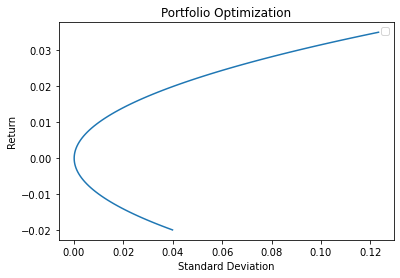

In [9]:
plt.plot(df['sigma_uncons'], df['return'])
plt.xlabel('Standard Deviation')
plt.ylabel('Return')
plt.title('Portfolio Optimization')
plt.legend()
plt.show()